In [106]:
import sys
sys.path.append('D:/Uni/Bachelorarbeit/Projekte/tm-christian')
import src.data.data_loader as dl
from src.features.vectorizer import Vectorizer
from src.models.topic_models import TopicModel as tm
import src.visualization.visualize_tm as vis

['.DS_Store',
 '.env',
 '.git',
 '.gitignore',
 '.idea',
 '.ipynb_checkpoints',
 '._.DS_Store',
 'clusteringMaria.ipynb',
 'data',
 'docs',
 'example.ipynb',
 'grafiken.ipynb',
 'GrafikenAufbestehendenDaten.ipynb',
 'HldaDemo.ipynb',
 'hldaTest.ipynb',
 'LICENSE',
 'Makefile',
 'models',
 'notebooks',
 'README.md',
 'reports',
 'requirements.txt',
 'src',
 'Untitled.ipynb',
 'venv']

In [24]:
data = dl.get_articles_by_sources(["zeit", "spiegel"], metadata=["article_time", "article_title"])
texts = data["article_texts"]

In [25]:
#vektor aus texten
vec = Vectorizer("tf", texts)
#für jedes dokumnet ein vektor -> bag of words
document_token_matrix = vec.get_document_token_matrix(texts)

<class 'scipy.sparse.csr.csr_matrix'>
(200, 19490)


In [26]:
#lda model
id2token = vec.get_id2token_mapping()
tm = TopicModel("lda", 10 ,document_token_matrix,id2token)

2018-06-09 15:27:18,205 : INFO : using symmetric alpha at 0.1
2018-06-09 15:27:18,208 : INFO : using symmetric eta at 0.1
2018-06-09 15:27:18,214 : INFO : using serial LDA version on this node
2018-06-09 15:27:18,246 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 200 documents, updating model once every 200 documents, evaluating perplexity every 0 documents, iterating 50x with a convergence threshold of 0.001000
2018-06-09 15:27:18,248 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-06-09 15:27:18,262 : INFO : PROGRESS: pass 0, at document #200/200
2018-06-09 15:27:18,514 : INFO : topic #7 (0.100): 0.004*"prozent" + 0.004*"landwirtschaft" + 0.004*"bio" + 0.003*"bauer" + 0.003*"deutschland" + 0.003*"ökologisch" + 0.003*"konventionell" + 0.003*"lebensmittel" + 0.003*"produkt" + 0.003*"jed"
2018-06-09 15:27:18,514 : INFO : topic #3 (0.100): 0.005*"

In [32]:
document_topic_matrix = tm.get_document_topic_matrix(document_token_matrix)
print(document_topic_matrix)
print(type(document_topic_matrix))

[[3.5095084e-04 3.5094720e-04 3.5094214e-04 ... 3.5094755e-04
  3.5095267e-04 3.5093122e-04]
 [1.2840393e-04 1.2840144e-04 4.8915389e-01 ... 1.2840703e-04
  1.2839715e-04 1.2839137e-04]
 [2.4974087e-02 5.4184813e-05 5.4183765e-05 ... 2.8221434e-01
  5.4180808e-05 5.4183834e-05]
 ...
 [9.8965341e-01 1.1495908e-03 1.1496771e-03 ... 1.1496283e-03
  1.1495886e-03 1.1497724e-03]
 [4.1673612e-04 9.9624926e-01 4.1674825e-04 ... 4.1674401e-04
  4.1673236e-04 4.1673856e-04]
 [3.9376185e-04 3.9380504e-04 3.9375856e-04 ... 9.9645597e-01
  3.9375480e-04 3.9379290e-04]]
<class 'numpy.ndarray'>


In [94]:
#limitation per row
#wie viele topics die grenze pro doc überschritten
def amount_topic_per_dokument(min_probability, matrix):
    newMatrix = []
    for matrixrow in range(0, len(matrix)):
        count = 0 
        for matrixcolumn in range(0,(len(matrix[0]))):
            if matrix[matrixrow, matrixcolumn] >= min_probability: 
                count +=1 
        newMatrix.append(count)
    max_topic_number = max(newMatrix)
    
    
    return newMatrix, max_topic_number
                
print(amount_topic_per_dokument(0.1, document_topic_matrix))


([1, 3, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 2, 2, 1, 1, 1, 3, 2, 3, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 4)


In [103]:
from collections import defaultdict
from collections import OrderedDict
doc_count_dict = defaultdict(int)

amount_topic_per_dokument2,x = amount_topic_per_dokument(0.1, document_topic_matrix)

for doc in amount_topic_per_dokument2: 
    doc_count_dict[doc] +=1
print(doc_count_dict)

asc = OrderedDict(sorted(doc_count_dict.items()))
print(asc)

k = [k for (k,v) in asc.items()]
print(k)

v = [v for (k,v) in asc.items()]
print(v)



defaultdict(<class 'int'>, {1: 138, 3: 9, 2: 52, 4: 1})
OrderedDict([(1, 138), (2, 52), (3, 9), (4, 1)])
[1, 2, 3, 4]
[138, 52, 9, 1]


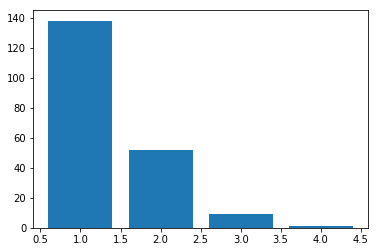

In [104]:
import matplotlib.pyplot as plt
import numpy as np


plt.bar(k,v)

plt.show()

In [81]:
#limitation per column
def amount_doc_per_topic(min_probability, matrix):
    newMatrix = []
    for matrixcolumn in range(0, (len(matrix[0]))):
        count = 0
        for matrixrow in range (0, len(matrix)):
            if matrix[matrixrow,matrixcolumn]>= min_probability: 
                count += 1
        newMatrix.append(count)
    return newMatrix
                
print(amount_doc_per_topic(0.1, document_topic_matrix))

[51, 12, 35, 28, 26, 29, 18, 41, 13, 20]


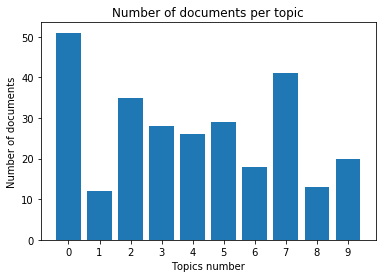

In [88]:
import matplotlib.pyplot as plt
import numpy as np

document_topic_list= amount_doc_per_topic(0.1, document_topic_matrix)

topicnumber = range(0,len(document_topic_list))
plt.bar(topicnumber,document_topic_list)

plt.title('Number of documents per topic')
plt.xlabel('Topics number')
plt.ylabel('Number of documents')
plt.xticks(topicnumber, topicnumber)

plt.show()